    
# Perform EDA on Haberman Dataset

### **Data Description:** 

The dataset contains a study conducted between 1958 and 1970 at the University of Chicago on **survival of patients** who had undergone surgery for breast cancer.

### **Data Attributes:**

1. Age of patient
2. Patient's year of operation
3. Number of positive lymph nodes detected
4. Survival Status (1 = survived 5 years; 2 = died within 5 year)
    

### **Objective:**

**To analyze the data to know, how to predict a patient will survive or not**, based on his age, number of positive lymph nodes and year in which the operation was conducted.

## 1. Load Data

In [46]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load haberman.csv into a pandas dataFrame.
# Survival data of patients who had undergone surgery for breast cancer
haberman = pd.read_csv("haberman.csv")
    
# (Q) how many data-points and features?
print (haberman.shape)

# See the input data.
haberman.head(5)
# Identified the columns doesnt have header information.

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [47]:
# Give column names based on attribute information
haberman.columns = ['Age', 'Year', 'Nodes', 'Survived']

# See the input data.
haberman.head(5)

,Age,Year,Nodes,Survived
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# 2. Input Data Analysis & Preparation

In [48]:
# Check characteristics of data.
haberman.info()
haberman.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age         305 non-null int64
Year        305 non-null int64
Nodes       305 non-null int64
Survived    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


,Age,Year,Nodes,Survived
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [49]:

# To make 4th column (class label), more meaningful, replace with Survival Status
haberman.loc[haberman['Survived'] == 1, 'Survived'] = "yes"
haberman.loc[haberman['Survived'] == 2, 'Survived'] = "no"

#(Q) How many data points for each class are present?
haberman["Survived"].value_counts()


yes    224
no      81
Name: Survived, dtype: int64

# 3. Univariate Analysis

Univariate Analysis is conducted **to find out whether any single feature in the dataset is enough to build a model** to identify whether a patient would survive or not.

## 3.1 Probability Distribution Function (PDF)

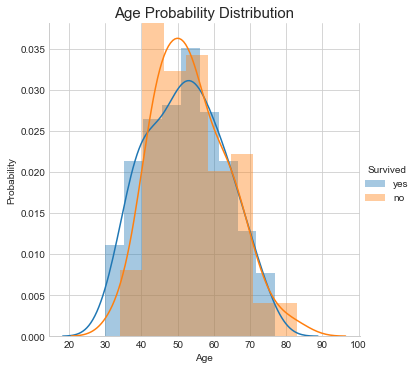

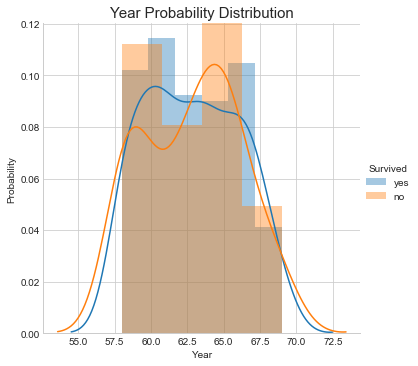

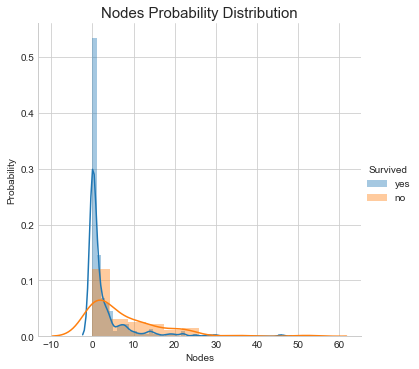

In [50]:
# Plot PDF of each feature 

for col in haberman.columns[:-1]:
    sns.FacetGrid(haberman, hue="Survived", size=5) \
       .map(sns.distplot, col) \
       .add_legend();
    plt.title(col+' Probability Distribution',fontsize=15)
    plt.ylabel('Probability')
    plt.show();

## 3.2 Cumulative Distribution Function (CDF)

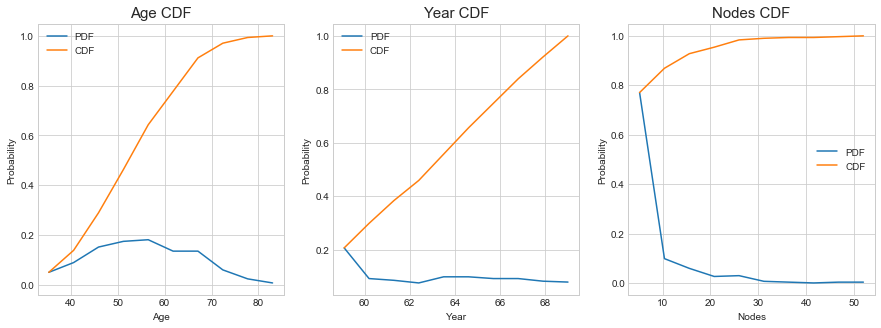

In [51]:

# You can get the success percentage directly from CDF given one ‘x’ value. 
# Such information is not available from PDF directly

plt.figure(figsize=(15,5))

for idx, col in enumerate(haberman.columns[:-1]):
    counts, bin_edges = np.histogram(haberman[col], bins=10, 
                                     density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    
    plt.subplot(1, 3, idx+1)
    plt.plot(bin_edges[1:],pdf, label='PDF')
    plt.plot(bin_edges[1:],cdf, label='CDF')
    plt.title(col + " CDF",fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.legend()


## 3.3 Box Plots

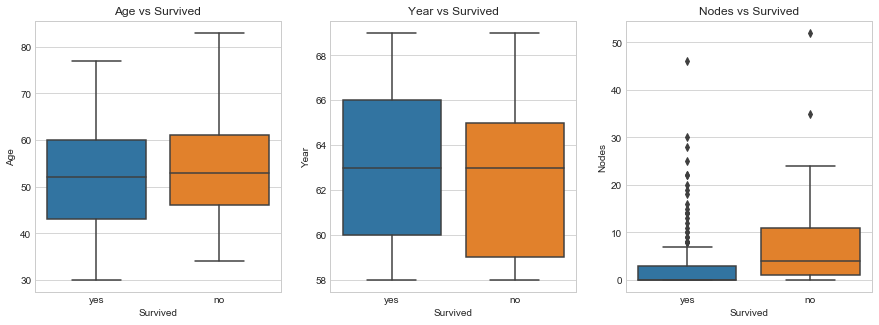

In [52]:
#Box-plot with whiskers: another method of visualizing the 
#1-D scatter plot more intuitively.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(haberman.columns[:-1]):
    sns.boxplot(x='Survived',y=col, data=haberman, 
                ax=axes[idx]).set_title(col+' vs Survived')
plt.show()

## 3.4 Violin Plot

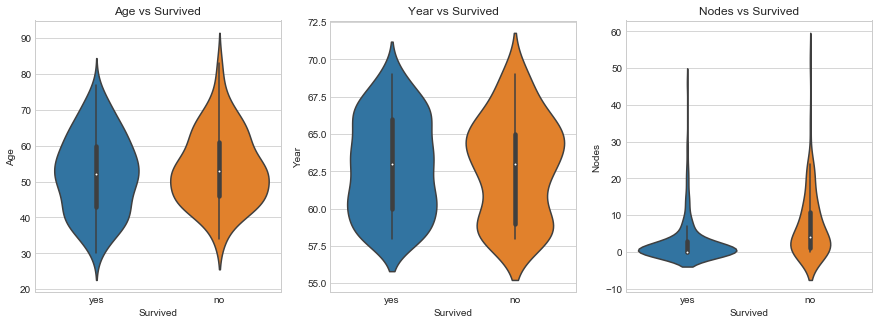

In [53]:
# A violin plot combines the benefits of the previous two plots and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(haberman.columns[:-1]):
    sns.violinplot(x="Survived", y=col, data=haberman, size=8, ax=axes[idx]) \
    .set_title(col+' vs Survived')
plt.show()

# Multi-variate Analysis

## 3.1 2-D Scatter Plot

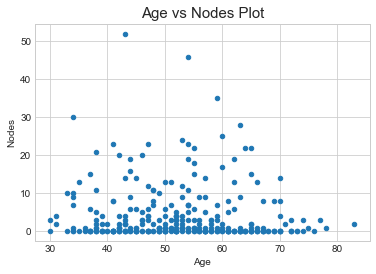

In [54]:
#2-D scatter plot:
#plot 2 features (chosen intuitively) that can  impact surivability

haberman.plot(kind='scatter', x='Age', y='Nodes')
plt.title("Age vs Nodes Plot",fontsize=15)
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.show()
#cant make much sense of data. 
#Will try color the points by class label (survived or not). 

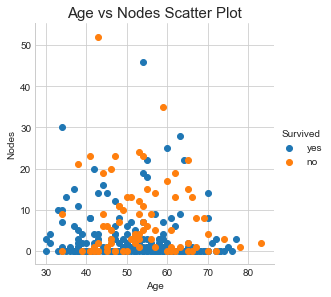

In [55]:
# 2-D Scatter plot with color-coding for each class: survived or not 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survived", size=4) \
   .map(plt.scatter, "Age", "Nodes") \
   .add_legend();
plt.title('Age vs Nodes Scatter Plot',fontsize=15)
plt.show();

# The orange and blue data points are not easily separable. 
# Considerable overlap is there. We will try multiple 2-D scatter 
# plots for each combination of features using pair plot.

## 1.3 Pair Plot

Text(0.5,0.98,'Age vs Year vs Nodes Pair Plot')

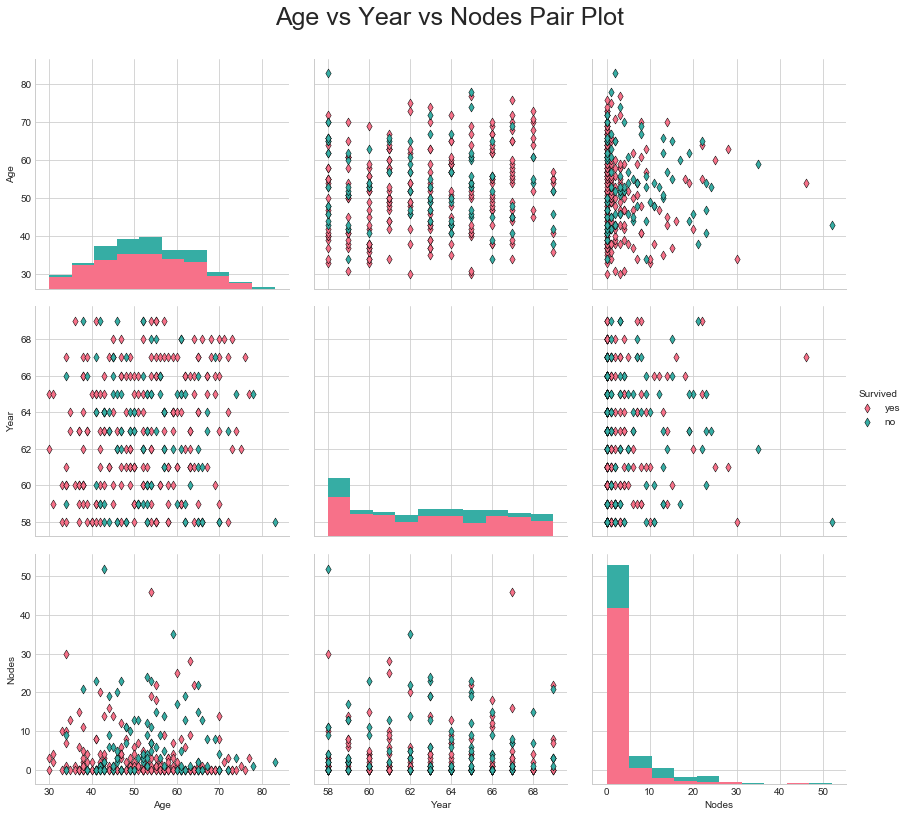

In [56]:
# Pairwise scatter plot: Pair-Plot: 
# To estimate which combination of features are the 
# best among to get maximum classification. 
# NOTE: the diagnol elements are PDFs for each feature. 

# plt.close();
# sns.set_style("whitegrid");
# sns.pairplot(haberman[:-1], hue="Survived", size=4)
# plt.title()
# plt.show()

g = sns.pairplot(haberman, hue='Survived', 
                 palette='husl', markers='d', size=4, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

g.fig.subplots_adjust(top=0.92, bottom=0.08)
g.fig.suptitle('Age vs Year vs Nodes Pair Plot',fontsize=25)

# Observations

## High-Level Analysis

1. Haberman is an **imbalanced dataset** with 224 survived patients & 81 otherwise
2. To make haberman balanced, either under-sample positive class or over-sample negative class. In imbalanced sets, classification algorithms like KNN will favour majority class. 
3. **25% of patients dont have any positive lymph node, 50% patients have <=1** and 75% have <= 4 positive lymph nodes. Maximum number of lymph nodes = 52 seems very rare.
4. **50% of patients are in 44-61 age group**, though age ranges from 30 to 83.
5. Haberman **doesnt have missing values**, hence data imputation is not required.

## Univariate Analysis

1. PDF: The number of positive lymph nodes are **highly dense between 0-5**
2. CDF: **Nearly 80%** of positive lymph nodes are **less than 5**
3. Box-Plot: Patients who were **treated in later years had higher chances of survival.** 
4. Box-Plot: Patients with **higher # of positive lymph nodes has much less chances of survival.**
5. Violin-Plot: Same conclusions as in Box Plot.

## Multi-variate Analysis & Conclusion

1. **With given features**, survived & non-survived patient data points show **overlapping behaviour.** It is difficult to predict survivability with good accuracy as the data is **not clearly separable.**
2. Among the pair plots, **'Year of Operation vs Lymph Nodes' plot provides better seperation.**
3. 'Age vs Lymph' Nodes plot could also be used for classification.